In [97]:
from torchvision import transforms
from torchvision.datasets import EMNIST
import os
import h5py
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data.dataloader import DataLoader
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
import seaborn as sns
import pandas as pd

In [89]:
data_dir = os.path.dirname(os.getcwd().replace('\\',
                                               '/')) + '/datasets/downloaded'
dataset = EMNIST(data_dir,
                 train=True,
                 download=True,
                 split='byclass',
        )
test_dataset = EMNIST(data_dir,
                      train=False,
                      download=True,
                      split='byclass',
                      transform=transforms.Compose([ToTensor()]))

In [90]:
dataset.data = dataset.data.reshape(-1,28,28).swapaxes(1,2)

In [91]:
len(dataset), len(test_dataset)

(697932, 116323)

In [25]:
labels = []
for _,j in dataset:
    labels.append(j)

In [26]:
counts = np.bincount(labels)
values = []
for i in range(62):
    if i>= 10 and i <=35:
        values.append(chr(i -10 + 65))
    elif i >=36 and i <= 61:
        values.append(chr(i - 36 + 97))
    else:
        values.append(i)
df = pd.DataFrame({'label':values, 'count': counts })
df.sort_values('count',ascending=False,inplace=True)

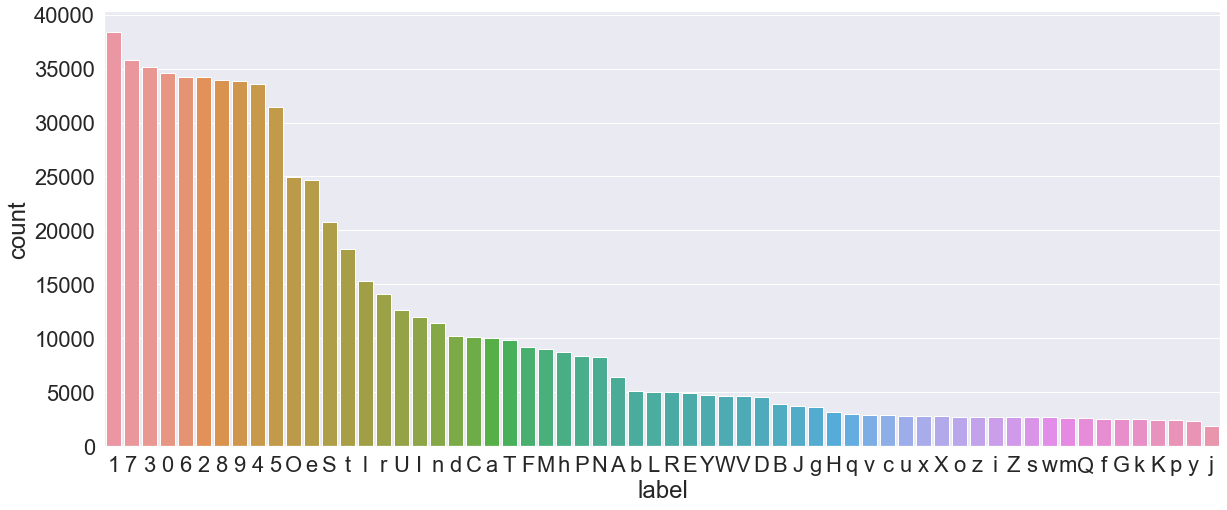

In [27]:
sns.set(font_scale = 2)
fig, ax = plt.subplots(figsize=(20, 8))
g = sns.barplot(x='label', y='count',data = df, ax = ax,order = df.label);

In [28]:
uniques = []
values = []
for i,j  in dataset:
    if(len(uniques) == 62):
        break
    if j not in values:
        uniques.append({'img': i, 'label':j})
        values.append(j)

In [33]:
def label_to_value(label):
    if label>= 10 and label <=35:
        label = chr(label -10 + 65)
    elif label >=36 and label <= 61:
        label = chr(label - 36 + 97)
    return label

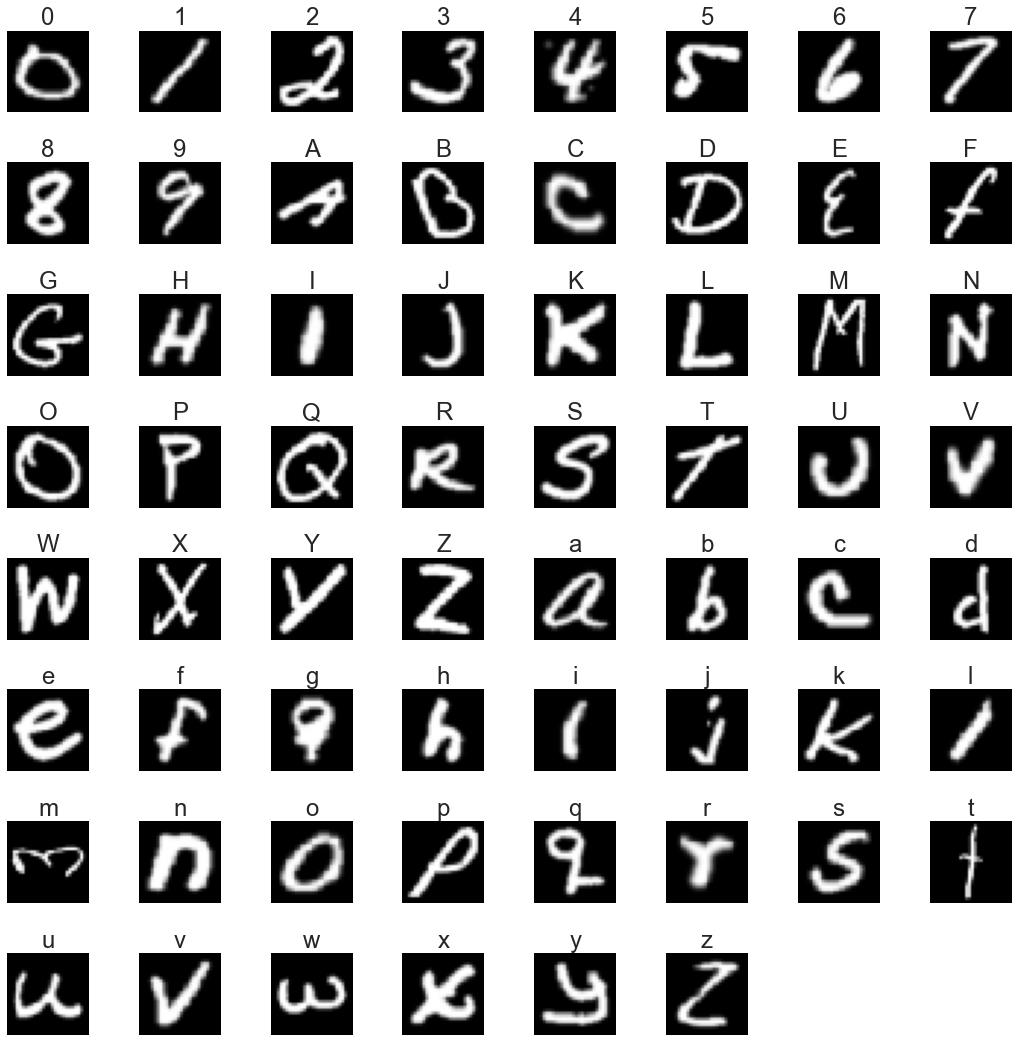

In [69]:
fig = plt.figure(figsize=(15, 15))
for i in values:
    ax = fig.add_subplot(8, 8, i + 1)
    data = list(filter(lambda data: data['label'] ==  i, uniques))
    image = data[0]['img']
    label = data[0]['label']
    label = label_to_value(label)
    ax.imshow(image, cmap='gray')
    ax.set_title(label)
    ax.axis('off')
fig.tight_layout()

In [56]:
def plot_img(image, label):
    plt.imshow(image,cmap='gray');
    plt.title(label);
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(label_to_value(label));

In [92]:
x_train = dataset.data
y_train = dataset.targets+4

In [93]:
def balance_dataset(images, labels):
    """Balances dataset by taking at most the mean number of samples per class

    Args:
        images (torch.Tensor): Images (Inputs)
        labels (torch.Tensor): Labels (Outputs)
    """

    # Count number of occurrences of each value in labels
    # and then find the mean value
    samples_per_class = int(np.bincount(labels).mean())
    unique_labels = np.unique(labels)
    new_indices = []

    for label in unique_labels:

        # Indices at which 'label' is present in 'labels'
        indices = np.where(labels == label)[0]

        # Take at most mean number of unique indices
        sampled_indices = list(
            np.unique(np.random.choice(indices, size=samples_per_class)))

        new_indices.extend(sampled_indices)

    sampled_labels = labels[new_indices]
    sampled_images = images[new_indices]

    return sampled_images, sampled_labels

In [94]:
# Balance dataset
x_train, y_train = balance_dataset(x_train, y_train)

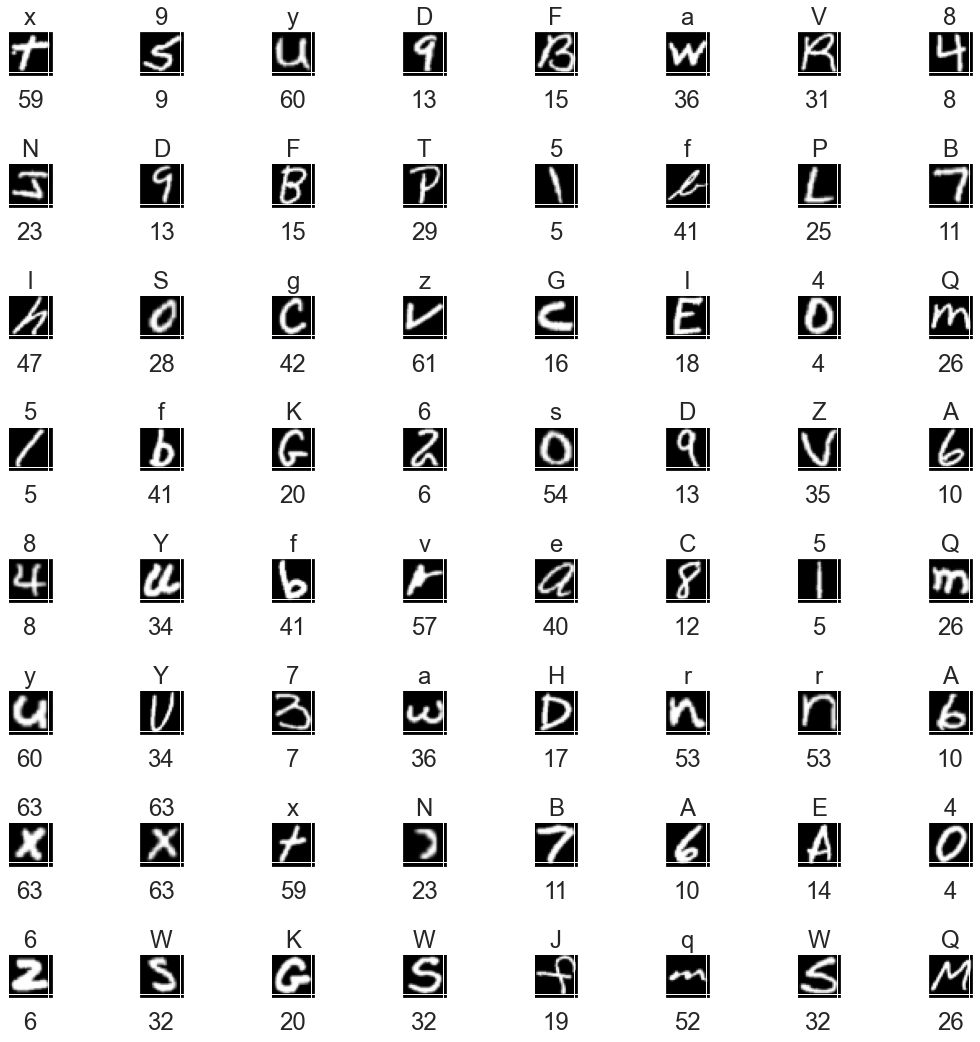

In [96]:
fig = plt.figure(figsize=(15, 15))
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1)
    idx = np.random.choice(len(x_train))
    image = x_train[idx]
    label = y_train[idx].item()
    ax.imshow(image, cmap='gray')
    ax.set_title(label_to_value(label))
    ax.set_xlabel(label)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
fig.tight_layout()

In [95]:
len(x_train),len(y_train)

(325174, 325174)

In [110]:
x_train = []
y_train = []
PROCESSED_DATA_FILENAME = os.path.dirname(os.getcwd().replace('\\',
                                               '/')) + '/datasets/processed/EMNIST/emnist_byclass.h5'
with h5py.File(PROCESSED_DATA_FILENAME, 'r') as file:
    x_train = file['x_train'][:]
    y_train = torch.LongTensor(file['y_train'][:])

In [114]:
dataset.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   2,   2,   2,   4,   4,   4,
           4,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   1,  34,  84, 170, 173, 174, 217, 217, 217,
         203, 129, 114,  38,  21,   4,   2,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  19, 201, 233, 251, 252, 252, 254, 254, 254,
         254, 250, 245, 216, 172, 125,  82,  34,   1,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   8, 207, 253, 254, 254, 254, 254, 254, 254,
         255, 255, 255, 254, 254, 254, 252, 243, 123,  22,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,  90, 218, 233, 217, 217, 217, 222, 249,
         250, 250, 252, 254, 254, 255, 254, 254, 232, 126,   2,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   1,  1

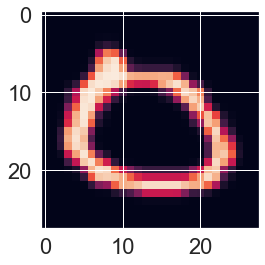

In [122]:
plt.imshow(torch.from_numpy(x_train[0]))